In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### LOAD_DATA

In [2]:
excel = pd.read_excel('SJY.xls')
excel.iloc[:,:]

,年份,CPI,人均GDP,居民消费水平,销售额
0,2009,519.0,26180,9226.1,0.50
1,2010,536.1,30808,10550.0,9.36
2,2011,565.0,36302,12646.4,52.00
3,2012,579.7,39874,14075.3,191.00
4,2013,594.8,43684,15615.1,352.00
5,2014,606.7,47173,17271.1,571.00
6,2015,615.2,50237,18929.0,912.00
7,2016,627.5,54139,20877.0,1207.00
8,2017,637.5,60014,23069.9,1682.69
9,2018,650.9,66006,25378.3,2135.00


### DISPLAY_DATA

In [3]:
excel.iloc[:,[0,1,2,3,4]]

,年份,CPI,人均GDP,居民消费水平,销售额
0,2009,519.0,26180,9226.1,0.50
1,2010,536.1,30808,10550.0,9.36
2,2011,565.0,36302,12646.4,52.00
3,2012,579.7,39874,14075.3,191.00
4,2013,594.8,43684,15615.1,352.00
5,2014,606.7,47173,17271.1,571.00
6,2015,615.2,50237,18929.0,912.00
7,2016,627.5,54139,20877.0,1207.00
8,2017,637.5,60014,23069.9,1682.69
9,2018,650.9,66006,25378.3,2135.00


In [4]:
header = ['年份','CPI','人均GDP','居民消费水平','销售额']
data = list()
data.append(pd.to_numeric(excel['年份']))
data.append(pd.to_numeric(excel['CPI']))
data.append(pd.to_numeric(excel['人均GDP']))
data.append(pd.to_numeric(excel['居民消费水平']))
data.append(pd.to_numeric(excel['销售额']))

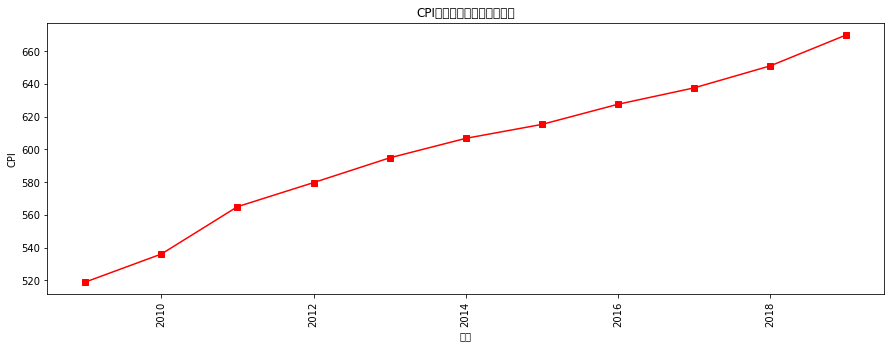

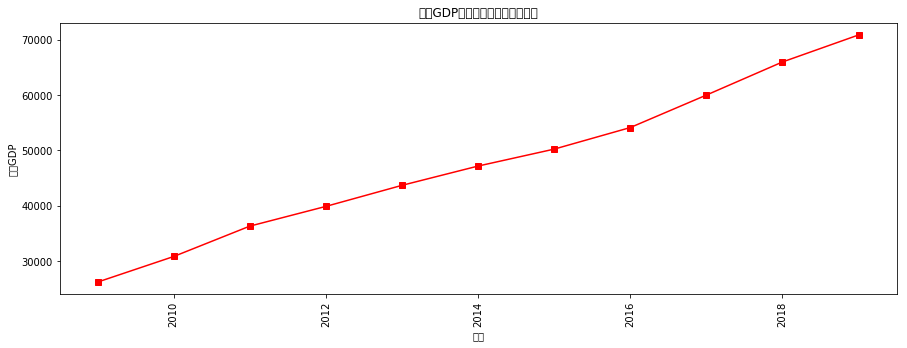

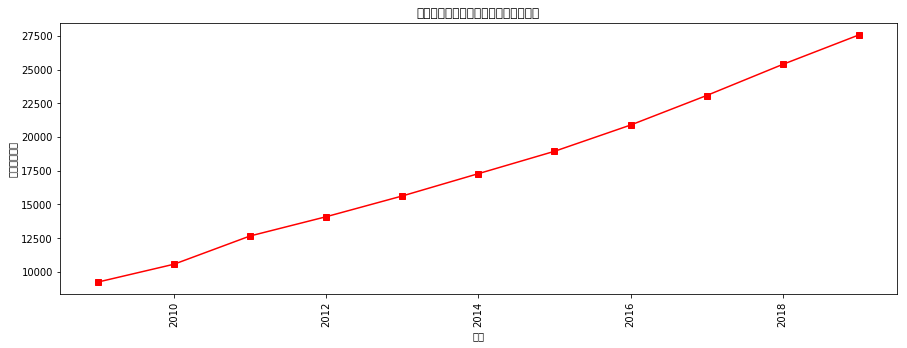

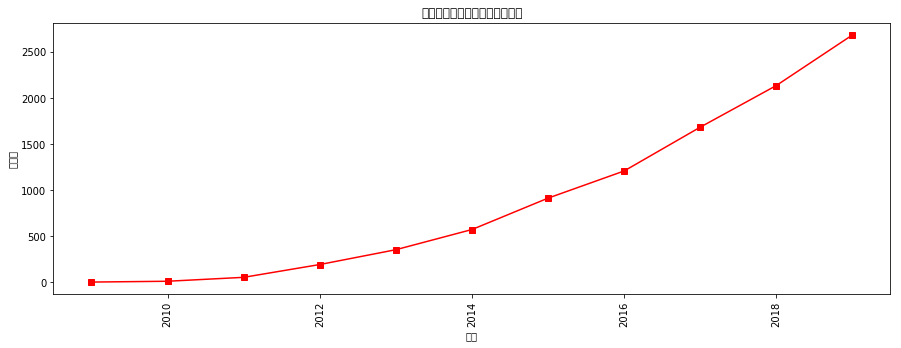

In [5]:
for i in range(1,5):
    plt.figure(figsize=(15,5))
    plt.plot(data[0],data[i],'r-s')
    plt.xticks(rotation=90)
    plt.xlabel(header[0])
    plt.ylabel(header[i])
    plt.title(header[i]+'根据年份不同的分布情况')
    plt.show()

### ANALYSE_DATA

In [6]:
import numpy as np

def uniform_norm(X_in):
    X_max = X_in.max(axis=0)
    X_min = X_in.min(axis=0)
    X = (X_in - X_min) / (X_max - X_min)
    return X, X_max, X_min

def feature_label_split(pd_data):
    # 行数、列数
    row_cnt = pd_data.shape[0] - 1
    column_cnt = 4
    # 生成新的X、Y矩阵
    X = np.empty([row_cnt, column_cnt - 1])  # 生成两个随机未初始化的矩阵
    Y = np.empty([row_cnt, 1])
    for i in range(1, row_cnt+1):
        row_array = pd_data.iloc[i,[1,2,3,4]]
        X[i-1] = np.array(row_array[0:3])
        Y[i-1] = np.array(row_array[4])
    return X, Y

train_data = pd.read_excel("SJY.xls", header=None)
train_X, train_Y = feature_label_split(train_data)
unif_trainX, X_max, X_min = uniform_norm(train_X)

In [7]:
import statsmodels.api as sm
model = sm.OLS(train_Y,train_X)
model = model.fit()
model.summary()

D:\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
D:\anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     148.7
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           2.35e-07
Time:                        14:19:39   Log-Likelihood:                -71.893
No. Observations:                  11   AIC:                             149.8
Df Residuals:                       8   BIC:                             151.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.5293      1.229     -2.058      0.074      -5.363       0.304
x2            -0.1063      0.091     -1.172      0.275      -0.316       0.103
x3             0.4217      0.205      2.052      0.074      -0.052       0.896
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.667
Skew:                           0.246   Prob(JB):                        0.716
Kurtosis:                       1.898   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""